# 3) Plot 5 day Moving/Rolling Average of Volume Traded for every coin in given period: [01/01/20 – 31/01/20].


In [188]:
#loading libraries
import pandas as pd
import pandas_ta as ta
import numpy as np
from datetime import datetime
import matplotlib.pyplot as plt
import random
import seaborn as sns
import warnings
warnings.simplefilter("ignore")
%matplotlib Inline

In [189]:
#load the dataset
data = pd.read_csv(r"D:\Downloads\merged-csv-files.csv",error_bad_lines = False)

In [190]:
#understanding the data
data.shape 

(20326, 10)

In [191]:
data.nunique()

SNo           2991
Name             9
Symbol           9
Date          2991
High         19560
Low          19616
Open         19552
Close        19548
Volume       19681
Marketcap    19561
dtype: int64

In [192]:
data.describe()

,SNo,High,Low,Open,Close,Volume,Marketcap
count,20326.000000,20326.000000,20326.000000,20326.000000,20326.000000,2.032600e+04,2.032600e+04
mean,1269.771770,1074.557501,1009.578583,1043.746210,1045.510322,5.055300e+09,2.534820e+10
std,795.282417,5083.424717,4754.056415,4931.324697,4936.606422,1.568536e+10,9.389105e+10
min,1.000000,0.001509,0.001091,0.001352,0.001357,0.000000e+00,0.000000e+00
25%,579.000000,0.222647,0.204617,0.212865,0.213343,2.425870e+06,2.006277e+08
50%,1214.000000,1.797290,1.629473,1.700735,1.712231,1.364441e+08,2.157231e+09
75%,1915.000000,133.896105,124.817358,129.226224,129.315848,2.078718e+09,1.018387e+10
max,2991.000000,64863.098910,62208.964370,63523.754870,63503.457930,3.509680e+11,1.186360e+12


In [193]:
data.head(5)

,SNo,Name,Symbol,Date,High,Low,Open,Close,Volume,Marketcap
0,1,Bitcoin,BTC,29-04-2013 23:59,147.488007,134.000000,134.444000,144.539993,0.0,1.603769e+09
1,2,Bitcoin,BTC,30-04-2013 23:59,146.929993,134.050003,144.000000,139.000000,0.0,1.542813e+09
2,3,Bitcoin,BTC,01-05-2013 23:59,139.889999,107.720001,139.000000,116.989998,0.0,1.298955e+09
3,4,Bitcoin,BTC,02-05-2013 23:59,125.599998,92.281898,116.379997,105.209999,0.0,1.168517e+09
4,5,Bitcoin,BTC,03-05-2013 23:59,108.127998,79.099998,106.250000,97.750000,0.0,1.085995e+09


In [194]:
data.tail(5)

,SNo,Name,Symbol,Date,High,Low,Open,Close,Volume,Marketcap
20321,1388,TRON,TRX,02-07-2021 23:59,0.066593,0.063369,0.064808,0.066512,849413563.8,4.766239e+09
20322,1389,TRON,TRX,03-07-2021 23:59,0.067337,0.065282,0.066566,0.066813,732889829.8,4.787777e+09
20323,1390,TRON,TRX,04-07-2021 23:59,0.068182,0.065113,0.066834,0.067298,844766257.1,4.822577e+09
20324,1391,TRON,TRX,05-07-2021 23:59,0.067344,0.063691,0.067330,0.064574,798184866.2,4.627367e+09
20325,1392,TRON,TRX,06-07-2021 23:59,0.066369,0.064010,0.064549,0.064935,699504110.9,4.653234e+09


In [195]:
 print(data['Symbol'].unique())
 print(data['Name'].unique())   

['BTC' 'ETH' 'LTC' 'XMR' 'XRP' 'SOL' 'XLM' 'USDT' 'TRX']
['Bitcoin' 'Ethereum' 'Litecoin' 'Monero' 'Ripple' 'Solana' 'Stellar'
 'Tether' 'TRON']


In [196]:
#counting Nan values
data.isna().sum()

SNo          0
Name         0
Symbol       0
Date         0
High         0
Low          0
Open         0
Close        0
Volume       0
Marketcap    0
dtype: int64

In [197]:
#checking the data type
data.dtypes

SNo            int64
Name          object
Symbol        object
Date          object
High         float64
Low          float64
Open         float64
Close        float64
Volume       float64
Marketcap    float64
dtype: object

In [198]:
#coverting date into datatime
data['Date'] = data['Date'].astype('datetime64[ns]')

In [199]:
#correcting date format
data['Date'] = data['Date'].dt.strftime('%d-%m-%Y')
data.head(5)

,SNo,Name,Symbol,Date,High,Low,Open,Close,Volume,Marketcap
0,1,Bitcoin,BTC,29-04-2013,147.488007,134.000000,134.444000,144.539993,0.0,1.603769e+09
1,2,Bitcoin,BTC,30-04-2013,146.929993,134.050003,144.000000,139.000000,0.0,1.542813e+09
2,3,Bitcoin,BTC,05-01-2013,139.889999,107.720001,139.000000,116.989998,0.0,1.298955e+09
3,4,Bitcoin,BTC,05-02-2013,125.599998,92.281898,116.379997,105.209999,0.0,1.168517e+09
4,5,Bitcoin,BTC,05-03-2013,108.127998,79.099998,106.250000,97.750000,0.0,1.085995e+09


# Zero values can affect our dataset, So I convert zero into null, after that fill with mean values

In [200]:
data["Open"]=data["Open"].replace(0,np.nan)
data["High"]=data["High"].replace(0,np.nan)
data["Low"]=data["Low"].replace(0,np.nan)
data["Close"]=data["Close"].replace(0,np.nan)
data["Volume"]=data["Volume"].replace(0,np.nan)

In [201]:
data.isnull().sum()

SNo            0
Name           0
Symbol         0
Date           0
High           0
Low            0
Open           0
Close          0
Volume       628
Marketcap      0
dtype: int64

# Volume colume filled with mean

In [202]:
data['Volume'] = data['Volume'].fillna(data.groupby('Symbol')['Volume'].transform('mean'))
data

,SNo,Name,Symbol,Date,High,Low,Open,Close,Volume,Marketcap
0,1,Bitcoin,BTC,29-04-2013,147.488007,134.000000,134.444000,144.539993,1.186644e+10,1.603769e+09
1,2,Bitcoin,BTC,30-04-2013,146.929993,134.050003,144.000000,139.000000,1.186644e+10,1.542813e+09
2,3,Bitcoin,BTC,05-01-2013,139.889999,107.720001,139.000000,116.989998,1.186644e+10,1.298955e+09
3,4,Bitcoin,BTC,05-02-2013,125.599998,92.281898,116.379997,105.209999,1.186644e+10,1.168517e+09
4,5,Bitcoin,BTC,05-03-2013,108.127998,79.099998,106.250000,97.750000,1.186644e+10,1.085995e+09
...,...,...,...,...,...,...,...,...,...,...
20321,1388,TRON,TRX,07-02-2021,0.066593,0.063369,0.064808,0.066512,8.494136e+08,4.766239e+09
20322,1389,TRON,TRX,07-03-2021,0.067337,0.065282,0.066566,0.066813,7.328898e+08,4.787777e+09
20323,1390,TRON,TRX,07-04-2021,0.068182,0.065113,0.066834,0.067298,8.447663e+08,4.822577e+09
20324,1391,TRON,TRX,07-05-2021,0.067344,0.063691,0.067330,0.064574,7.981849e+08,4.627367e+09


# symbol - BTC

In [203]:
data_btc = data.loc[data['Symbol'] == 'BTC']

In [204]:
data_btc.head()

,SNo,Name,Symbol,Date,High,Low,Open,Close,Volume,Marketcap
0,1,Bitcoin,BTC,29-04-2013,147.488007,134.000000,134.444000,144.539993,1.186644e+10,1.603769e+09
1,2,Bitcoin,BTC,30-04-2013,146.929993,134.050003,144.000000,139.000000,1.186644e+10,1.542813e+09
2,3,Bitcoin,BTC,05-01-2013,139.889999,107.720001,139.000000,116.989998,1.186644e+10,1.298955e+09
3,4,Bitcoin,BTC,05-02-2013,125.599998,92.281898,116.379997,105.209999,1.186644e+10,1.168517e+09
4,5,Bitcoin,BTC,05-03-2013,108.127998,79.099998,106.250000,97.750000,1.186644e+10,1.085995e+09


In [205]:
#converting date type object to datetime64
data_btc['Date'] = data_btc['Date'].astype('datetime64[ns]')

In [206]:
data_btc['Date'] = data_btc['Date'].dt.strftime('%Y-%m-%d')

data_btc.head()

,SNo,Name,Symbol,Date,High,Low,Open,Close,Volume,Marketcap
0,1,Bitcoin,BTC,2013-04-29,147.488007,134.000000,134.444000,144.539993,1.186644e+10,1.603769e+09
1,2,Bitcoin,BTC,2013-04-30,146.929993,134.050003,144.000000,139.000000,1.186644e+10,1.542813e+09
2,3,Bitcoin,BTC,2013-05-01,139.889999,107.720001,139.000000,116.989998,1.186644e+10,1.298955e+09
3,4,Bitcoin,BTC,2013-05-02,125.599998,92.281898,116.379997,105.209999,1.186644e+10,1.168517e+09
4,5,Bitcoin,BTC,2013-05-03,108.127998,79.099998,106.250000,97.750000,1.186644e+10,1.085995e+09


In [207]:
#set date as index
data_btc = data_btc.set_index(pd.DatetimeIndex(data_btc['Date'].values))

In [208]:
data_btc.tail(10)

,SNo,Name,Symbol,Date,High,Low,Open,Close,Volume,Marketcap
2021-06-27,2982,Bitcoin,BTC,2021-06-27,34656.12736,32071.75715,32287.52321,34649.64459,3.551164e+10,6.494620e+11
2021-06-28,2983,Bitcoin,BTC,2021-06-28,35219.89179,33902.07589,34679.12222,34434.33531,3.389252e+10,6.454430e+11
2021-06-29,2984,Bitcoin,BTC,2021-06-29,36542.11102,34252.48489,34475.55970,35867.77774,3.790146e+10,6.723330e+11
2021-06-30,2985,Bitcoin,BTC,2021-06-30,36074.75976,34086.15188,35908.38805,35040.83725,3.405904e+10,6.568530e+11
2021-07-01,2986,Bitcoin,BTC,2021-07-01,35035.98271,32883.78123,35035.98271,33572.11765,3.783896e+10,6.293390e+11
2021-07-02,2987,Bitcoin,BTC,2021-07-02,33939.58870,32770.68078,33549.60018,33897.04859,3.872897e+10,6.354510e+11
2021-07-03,2988,Bitcoin,BTC,2021-07-03,34909.25990,33402.69654,33854.42136,34668.54840,2.438396e+10,6.499400e+11
2021-07-04,2989,Bitcoin,BTC,2021-07-04,35937.56715,34396.47746,34665.56487,35287.77977,2.492431e+10,6.615750e+11
2021-07-05,2990,Bitcoin,BTC,2021-07-05,35284.34443,33213.66103,35284.34443,33746.00246,2.672155e+10,6.326960e+11
2021-07-06,2991,Bitcoin,BTC,2021-07-06,35038.53636,33599.91617,33723.50966,34235.19345,2.650126e+10,6.418990e+11


In [209]:
filtered_data_btc = data_btc.query("Date >= '2020-01-01' \
                       and Date < '2021-01-31'")
filtered_data_btc

,SNo,Name,Symbol,Date,High,Low,Open,Close,Volume,Marketcap
2020-01-01,2439,Bitcoin,BTC,2020-01-01,7254.330611,7174.944153,7194.891971,7200.174393,1.856566e+10,1.305810e+11
2020-01-02,2440,Bitcoin,BTC,2020-01-02,7212.155253,6935.269972,7202.551122,6985.470001,2.080208e+10,1.266990e+11
2020-01-03,2441,Bitcoin,BTC,2020-01-03,7413.715099,6914.995908,6984.428612,7344.884183,2.811148e+10,1.332330e+11
2020-01-04,2442,Bitcoin,BTC,2020-01-04,7427.385794,7309.514012,7345.375275,7410.656566,1.844427e+10,1.344420e+11
2020-01-05,2443,Bitcoin,BTC,2020-01-05,7544.496872,7400.535561,7410.451694,7411.317327,1.972507e+10,1.344700e+11
...,...,...,...,...,...,...,...,...,...,...
2021-01-26,2830,Bitcoin,BTC,2021-01-26,32794.549590,31030.265970,32358.613170,32569.849560,6.025542e+10,6.061690e+11
2021-01-27,2831,Bitcoin,BTC,2021-01-27,32564.030240,29367.139220,32564.030240,30432.547080,6.257676e+10,5.664170e+11
2021-01-28,2832,Bitcoin,BTC,2021-01-28,33858.310990,30023.206830,30441.041820,33466.096360,7.651716e+10,6.229100e+11
2021-01-29,2833,Bitcoin,BTC,2021-01-29,38406.260960,32064.814190,34318.671690,34316.387650,1.178950e+11,6.387690e+11


# 5 day Moving average of Volume

The moving average plays a key role in identifying where the price may head.

In [210]:
#create a function to calculate SMA
def SMA(filtered_data_btc, period = 5,column = 'Volume'):
    return filtered_data_btc[column].rolling(window=period).mean()

In [211]:
#create two column to store 5 SMA
filtered_data_btc['SMA5'] = SMA(filtered_data_btc,5)

In [1]:
#visually show the SMA
plt.figure(figsize=(16,8))
plt.title('5 day Moving average of Volume of BTC', fontsize = 18)
plt.plot(filtered_data_btc['Volume'],alpha=0.5, label='Volume')
plt.plot(filtered_data_btc['SMA5'],alpha=0.5, label='SMA5')
plt.xlabel('Date',fontsize=18)
plt.ylabel('Volume', fontsize=18)
plt.show()

NameError: name 'plt' is not defined

# ETH

In [213]:
#grabing data for ETH 
data_eth = data.loc[data['Symbol'] == 'ETH']
#print data head
data_eth.head()
#converting date type object to datetime64
data_eth['Date'] = data_eth['Date'].astype('datetime64[ns]')
#formating date
data_eth['Date'] = data_eth['Date'].dt.strftime('%Y-%m-%d')
data_eth.head()

#set date as index
data_eth = data_eth.set_index(pd.DatetimeIndex(data_eth['Date'].values))

filtered_data_eth = data_eth.query("Date >= '2020-01-01' \
                       and Date < '2021-01-31'")
filtered_data_eth

,SNo,Name,Symbol,Date,High,Low,Open,Close,Volume,Marketcap
2020-01-01,1608,Ethereum,ETH,2020-01-01,132.835357,129.198285,129.630656,130.802008,7.935230e+09,1.427106e+10
2020-01-02,1609,Ethereum,ETH,2020-01-02,130.820038,126.954911,130.820038,127.410182,8.032709e+09,1.390251e+10
2020-01-03,1610,Ethereum,ETH,2020-01-03,134.554014,126.490020,127.411261,134.171713,1.047685e+10,1.464213e+10
2020-01-04,1611,Ethereum,ETH,2020-01-04,136.052714,133.040551,134.168523,135.069371,7.430905e+09,1.474195e+10
2020-01-05,1612,Ethereum,ETH,2020-01-05,139.410202,135.045629,135.072094,136.276777,7.526675e+09,1.487557e+10
...,...,...,...,...,...,...,...,...,...,...
2021-01-26,1999,Ethereum,ETH,2021-01-26,1376.085100,1253.340325,1323.741651,1357.058140,4.157292e+10,1.550000e+11
2021-01-27,2000,Ethereum,ETH,2021-01-27,1368.074059,1215.311258,1358.333332,1253.187133,3.939442e+10,1.430000e+11
2021-01-28,2001,Ethereum,ETH,2021-01-28,1356.288728,1226.173947,1251.279844,1332.492245,3.463723e+10,1.520000e+11
2021-01-29,2002,Ethereum,ETH,2021-01-29,1428.981208,1292.240078,1369.086768,1382.522812,5.361196e+10,1.580000e+11


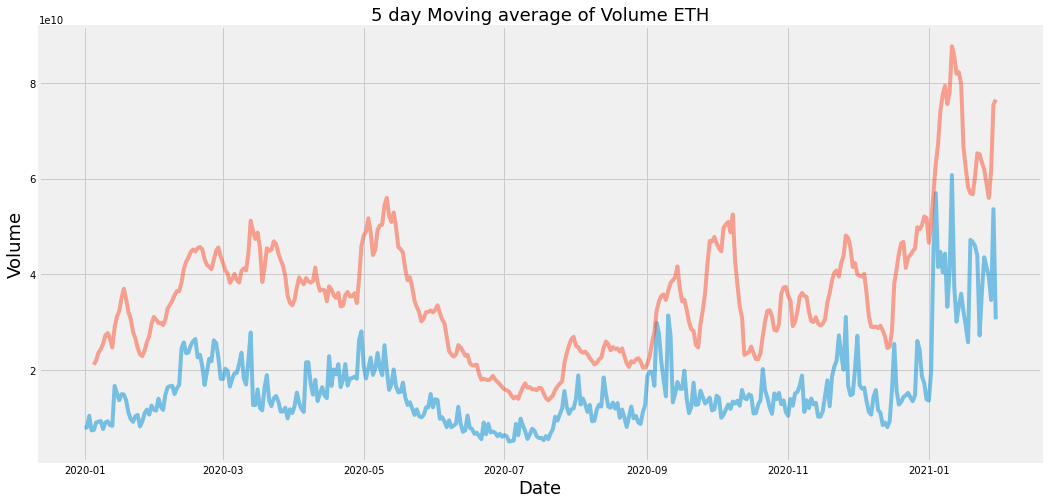

In [214]:
#create a function to calculate SMA
def SMA(filtered_data_eth, period = 5,column = 'Volume'):
    return filtered_data_eth[column].rolling(window=period).mean()
#create two column to store 5 SMA
filtered_data_eth['SMA5'] = SMA(filtered_data_btc,5)
#visually show the SMA
plt.figure(figsize=(16,8))
plt.title('5 day Moving average of Volume ETH', fontsize = 18)
plt.plot(filtered_data_eth['Volume'],alpha=0.5, label='Volume')
plt.plot(filtered_data_eth['SMA5'],alpha=0.5, label='SMA5')
plt.xlabel('Date',fontsize=18)
plt.ylabel('Volume', fontsize=18)
plt.show()

# LTC

In [28]:
#grabing data for LTC 
data_ltc = data.loc[data['Symbol'] == 'LTC']
#print data head
data_ltc.head()
#converting date type object to datetime64
data_ltc['Date'] = data_ltc['Date'].astype('datetime64[ns]')
#formating date
data_ltc['Date'] = data_ltc['Date'].dt.strftime('%Y-%m-%d')
data_ltc.head()

#set date as index
data_ltc = data_ltc.set_index(pd.DatetimeIndex(data_ltc['Date'].values))

filtered_data_ltc = data_ltc.query("Date >= '2020-01-01' \
                       and Date < '2021-01-31'")
filtered_data_ltc.head()

,SNo,Name,Symbol,Date,High,Low,Open,Close,Volume,Marketcap
2020-01-01,2439,Litecoin,LTC,2020-01-01,42.285019,41.288033,41.326536,42.017721,2.782992e+09,2.679229e+09
2020-01-02,2440,Litecoin,LTC,2020-01-02,42.134747,39.683567,42.018084,39.823015,2.759827e+09,2.539554e+09
2020-01-03,2441,Litecoin,LTC,2020-01-03,42.447175,39.450844,39.863129,42.415575,3.260961e+09,2.705194e+09
2020-01-04,2442,Litecoin,LTC,2020-01-04,43.342706,41.933076,42.383525,43.326608,2.843193e+09,2.763618e+09
2020-01-05,2443,Litecoin,LTC,2020-01-05,44.733614,42.998536,43.291382,43.553206,3.017148e+09,2.778397e+09


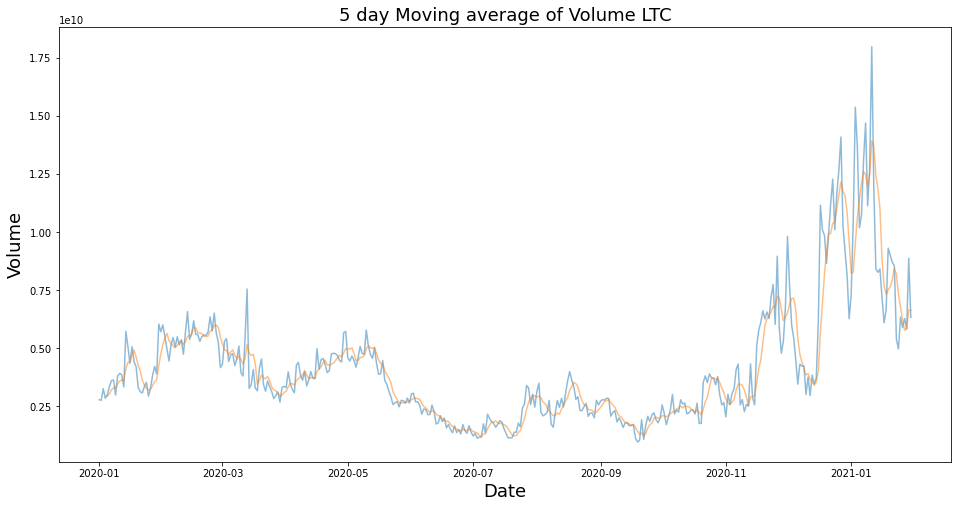

In [29]:
#create a function to calculate SMA
def SMA(filtered_data_ltc, period = 5,column = 'Volume'):
    return filtered_data_ltc[column].rolling(window=period).mean()
#create two column to store 5 SMA
filtered_data_ltc['SMA5'] = SMA(filtered_data_ltc,5)
#visually show the SMA
plt.figure(figsize=(16,8))
plt.title('5 day Moving average of Volume LTC', fontsize = 18)
plt.plot(filtered_data_ltc['Volume'],alpha=0.5, label='Volume')
plt.plot(filtered_data_ltc['SMA5'],alpha=0.5, label='SMA5')
plt.xlabel('Date',fontsize=18)
plt.ylabel('Volume', fontsize=18)
plt.show()

# XMR

In [30]:
#grabing data 
data_xmr = data.loc[data['Symbol'] == 'XMR']
#print data head
data_xmr.head()
#converting date type object to datetime64
data_xmr['Date'] = data_xmr['Date'].astype('datetime64[ns]')
#formating date
data_xmr['Date'] = data_xmr['Date'].dt.strftime('%Y-%m-%d')
data_xmr.head()

#set date as index
data_xmr = data_xmr.set_index(pd.DatetimeIndex(data_xmr['Date'].values))

filtered_data_xmr = data_xmr.query("Date >= '2020-01-01' \
                       and Date < '2021-01-31'")
filtered_data_xmr.head()

,SNo,Name,Symbol,Date,High,Low,Open,Close,Volume,Marketcap
2020-01-01,2050,Monero,XMR,2020-01-01,45.960216,44.502790,44.578461,45.753542,7.590315e+07,795254585.5
2020-01-02,2051,Monero,XMR,2020-01-02,46.214603,44.397277,45.764926,45.749471,8.164516e+07,795254542.9
2020-01-03,2052,Monero,XMR,2020-01-03,51.980942,45.642766,45.642766,51.092039,1.458267e+08,888197073.5
2020-01-04,2053,Monero,XMR,2020-01-04,51.545418,50.017022,51.054631,50.536695,6.195223e+07,878616619.7
2020-01-05,2054,Monero,XMR,2020-01-05,54.777560,50.536011,50.536011,54.096895,5.131611e+07,940587960.2


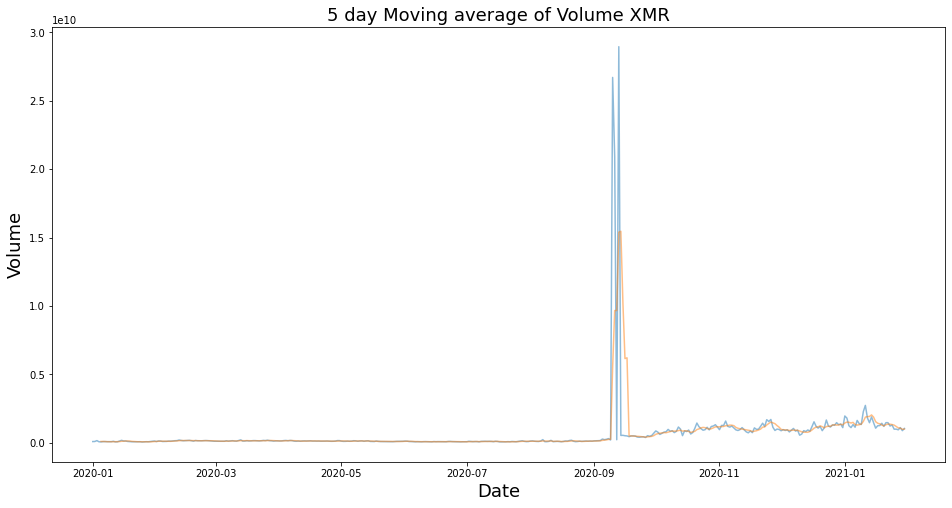

In [31]:
#create a function to calculate SMA
def SMA(filtered_data_xmr, period = 5,column = 'Volume'):
    return filtered_data_xmr[column].rolling(window=period).mean()
#create two column to store 5 SMA
filtered_data_xmr['SMA5'] = SMA(filtered_data_xmr,5)
#visually show the SMA
plt.figure(figsize=(16,8))
plt.title('5 day Moving average of Volume XMR', fontsize = 18)
plt.plot(filtered_data_xmr['Volume'],alpha=0.5, label='Volume')
plt.plot(filtered_data_xmr['SMA5'],alpha=0.5, label='SMA5')
plt.xlabel('Date',fontsize=18)
plt.ylabel('Volume', fontsize=18)
plt.show()

# XRP

In [32]:
#grabing data for LTC 
data_xrp = data.loc[data['Symbol'] == 'XRP']
#print data head
data_xrp.head()
#converting date type object to datetime64
data_xrp['Date'] = data_xrp['Date'].astype('datetime64[ns]')
#formating date
data_xrp['Date'] = data_xrp['Date'].dt.strftime('%Y-%m-%d')
data_xrp.head()

#set date as index
data_xrp = data_xrp.set_index(pd.DatetimeIndex(data_xrp['Date'].values))

filtered_data_xrp = data_xrp.query("Date >= '2020-01-01' \
                       and Date < '2021-01-31'")
filtered_data_xrp.head()

,SNo,Name,Symbol,Date,High,Low,Open,Close,Volume,Marketcap
2020-01-01,2341,Ripple,XRP,2020-01-01,0.194362,0.192107,0.192912,0.192667,1.041134e+09,8.349802e+09
2020-01-02,2342,Ripple,XRP,2020-01-02,0.192896,0.186947,0.192708,0.188043,1.085351e+09,8.149376e+09
2020-01-03,2343,Ripple,XRP,2020-01-03,0.194070,0.185846,0.187948,0.193521,1.270017e+09,8.386800e+09
2020-01-04,2344,Ripple,XRP,2020-01-04,0.194653,0.191835,0.193521,0.194355,9.993316e+08,8.422952e+09
2020-01-05,2345,Ripple,XRP,2020-01-05,0.199223,0.193884,0.194367,0.195537,1.168068e+09,8.474172e+09


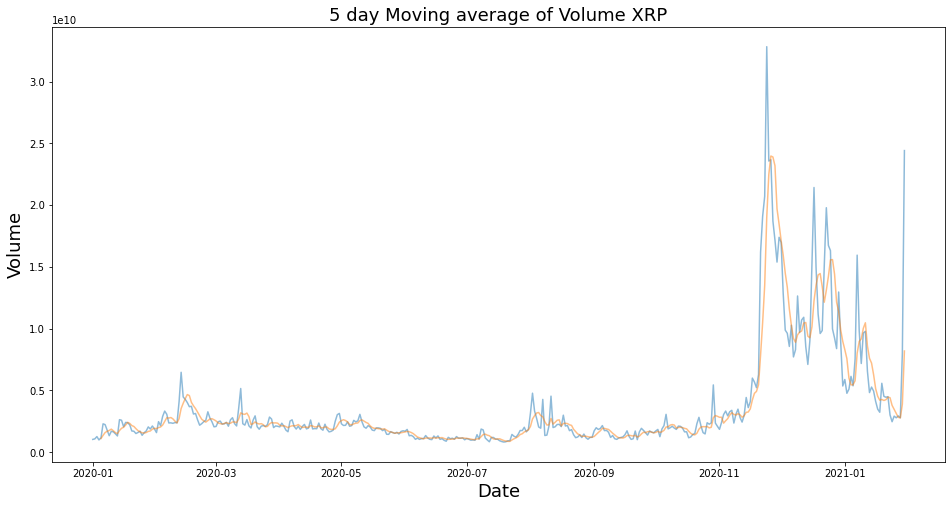

In [33]:
#create a function to calculate SMA
def SMA(filtered_data_xrp, period = 5,column = 'Volume'):
    return filtered_data_xrp[column].rolling(window=period).mean()
#create two column to store 5 SMA
filtered_data_xrp['SMA5'] = SMA(filtered_data_xrp,5)
#visually show the SMA
plt.figure(figsize=(16,8))
plt.title('5 day Moving average of Volume XRP', fontsize = 18)
plt.plot(filtered_data_xrp['Volume'],alpha=0.5, label='Volume')
plt.plot(filtered_data_xrp['SMA5'],alpha=0.5, label='SMA5')
plt.xlabel('Date',fontsize=18)
plt.ylabel('Volume', fontsize=18)
plt.show()

# SOL

In [34]:
#grabing data 
data_sol = data.loc[data['Symbol'] == 'SOL']
#print data head
data_sol.head()
#converting date type object to datetime64
data_sol['Date'] = data_sol['Date'].astype('datetime64[ns]')
#formating date
data_sol['Date'] = data_sol['Date'].dt.strftime('%Y-%m-%d')
data_sol.head()

#set date as index
data_sol = data_sol.set_index(pd.DatetimeIndex(data_sol['Date'].values))

filtered_data_sol = data_sol.query("Date >= '2020-01-01' \
                       and Date < '2021-01-31'")
filtered_data_sol.head()

,SNo,Name,Symbol,Date,High,Low,Open,Close,Volume,Marketcap
2020-04-11,1,Solana,SOL,2020-04-11,1.049073,0.765020,0.951054,0.776819,43862443.79,0.0
2020-04-12,2,Solana,SOL,2020-04-12,0.956670,0.762426,0.785448,0.882507,38736897.02,0.0
2020-04-13,3,Solana,SOL,2020-04-13,0.891603,0.773976,0.890760,0.777832,18211285.47,0.0
2020-04-14,4,Solana,SOL,2020-04-14,0.796472,0.628169,0.777832,0.661925,16747614.12,0.0
2020-04-15,5,Solana,SOL,2020-04-15,0.704964,0.621531,0.669289,0.646651,13075275.29,0.0


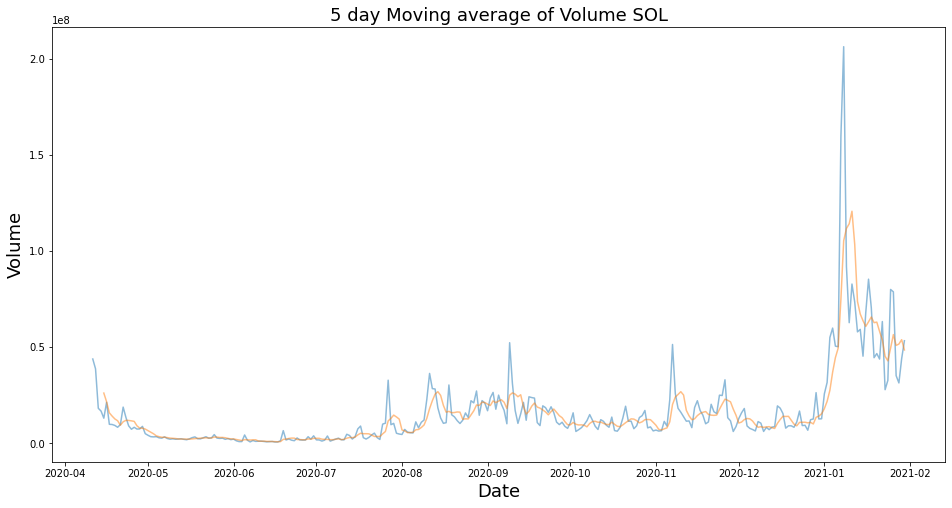

In [35]:
#create a function to calculate SMA
def SMA(filtered_data_sol, period = 5,column = 'Volume'):
    return filtered_data_sol[column].rolling(window=period).mean()
#create two column to store 5 SMA
filtered_data_sol['SMA5'] = SMA(filtered_data_sol,5)
#visually show the SMA
plt.figure(figsize=(16,8))
plt.title('5 day Moving average of Volume SOL', fontsize = 18)
plt.plot(filtered_data_sol['Volume'],alpha=0.5, label='Volume')
plt.plot(filtered_data_sol['SMA5'],alpha=0.5, label='SMA5')
plt.xlabel('Date',fontsize=18)
plt.ylabel('Volume', fontsize=18)
plt.show()

# XLM

In [36]:
#grabing data for XLM
data_xlm = data.loc[data['Symbol'] == 'XLM']
#print data head
data_xlm.head()
#converting date type object to datetime64
data_xlm['Date'] = data_xlm['Date'].astype('datetime64[ns]')
#formating date
data_xlm['Date'] = data_xlm['Date'].dt.strftime('%Y-%m-%d')
data_xlm.head()

#set date as index
data_xlm = data_xlm.set_index(pd.DatetimeIndex(data_xlm['Date'].values))

filtered_data_xlm = data_xlm.query("Date >= '2020-01-01' \
                       and Date < '2021-01-31'")
filtered_data_xlm.head()

,SNo,Name,Symbol,Date,High,Low,Open,Close,Volume,Marketcap
2020-01-01,1975,Stellar,XLM,2020-01-01,0.045768,0.043438,0.045118,0.045451,168402204.2,911500591.6
2020-01-02,1976,Stellar,XLM,2020-01-02,0.045604,0.043582,0.045398,0.044112,151848962.7,884665837.8
2020-01-03,1977,Stellar,XLM,2020-01-03,0.045907,0.043544,0.044001,0.045234,168931017.9,907150288.3
2020-01-04,1978,Stellar,XLM,2020-01-04,0.046276,0.044332,0.045227,0.046272,152253766.1,927967117.3
2020-01-05,1979,Stellar,XLM,2020-01-05,0.046692,0.044772,0.046165,0.045359,165956087.4,909657060.3


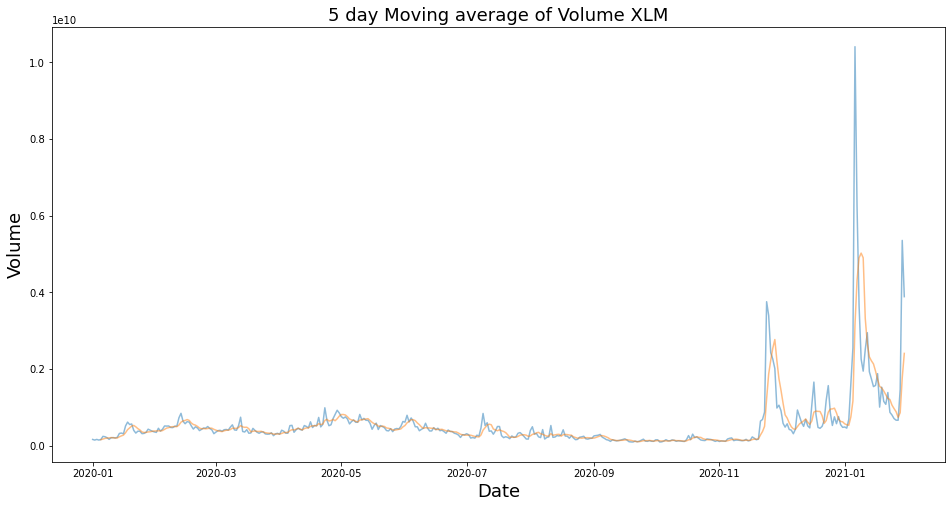

In [37]:
#create a function to calculate SMA
def SMA(filtered_data_xlm, period = 5,column = 'Volume'):
    return filtered_data_xlm[column].rolling(window=period).mean()
#create two column to store 5 SMA
filtered_data_xlm['SMA5'] = SMA(filtered_data_xlm,5)
#visually show the SMA
plt.figure(figsize=(16,8))
plt.title('5 day Moving average of Volume XLM', fontsize = 18)
plt.plot(filtered_data_xlm['Volume'],alpha=0.5, label='Volume')
plt.plot(filtered_data_xlm['SMA5'],alpha=0.5, label='SMA5')
plt.xlabel('Date',fontsize=18)
plt.ylabel('Volume', fontsize=18)
plt.show()

# USDT

In [38]:
#grabing data 
data_usdt = data.loc[data['Symbol'] == 'USDT']
#print data head
data_usdt.head()
#converting date type object to datetime64
data_usdt['Date'] = data_usdt['Date'].astype('datetime64[ns]')
#formating date
data_usdt['Date'] = data_usdt['Date'].dt.strftime('%Y-%m-%d')
data_usdt.head()

#set date as index
data_usdt = data_usdt.set_index(pd.DatetimeIndex(data_usdt['Date'].values))

filtered_data_usdt = data_usdt.query("Date >= '2020-01-01' \
                       and Date < '2021-01-31'")
filtered_data_usdt.head()

,SNo,Name,Symbol,Date,High,Low,Open,Close,Volume,Marketcap
2020-01-01,1766,Tether,USDT,2020-01-01,1.006873,0.994924,0.999571,0.999836,2.150314e+10,4.107371e+09
2020-01-02,1767,Tether,USDT,2020-01-02,1.008451,0.986515,0.999788,1.001565,2.421231e+10,4.114475e+09
2020-01-03,1768,Tether,USDT,2020-01-03,1.022286,0.988027,1.001183,1.004192,3.242029e+10,4.125267e+09
2020-01-04,1769,Tether,USDT,2020-01-04,1.013633,0.999160,1.003510,1.007472,2.158563e+10,4.138741e+09
2020-01-05,1770,Tether,USDT,2020-01-05,1.016161,1.001758,1.009921,1.006197,2.409014e+10,4.133501e+09


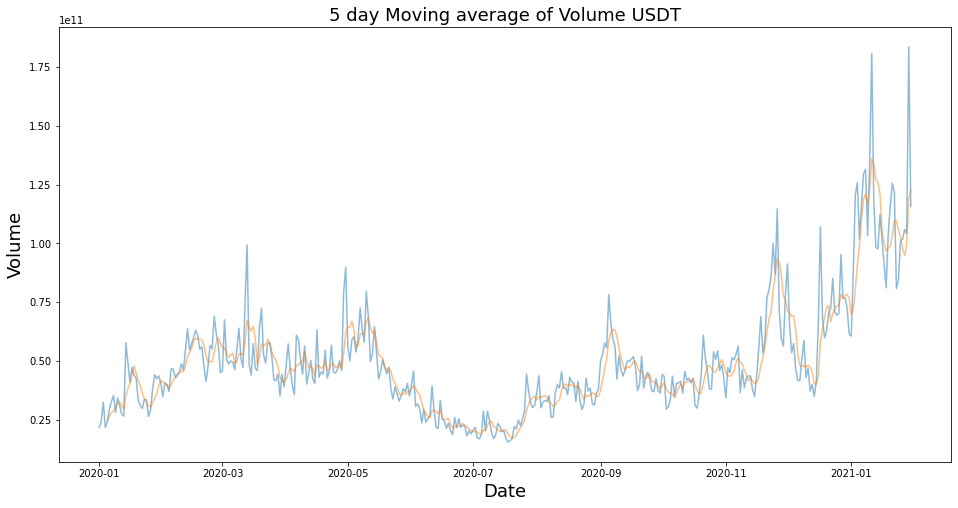

In [39]:
#create a function to calculate SMA
def SMA(filtered_data_usdt, period = 5,column = 'Volume'):
    return filtered_data_usdt[column].rolling(window=period).mean()
#create two column to store 5 SMA
filtered_data_usdt['SMA5'] = SMA(filtered_data_usdt,5)
#visually show the SMA
plt.figure(figsize=(16,8))
plt.title('5 day Moving average of Volume USDT', fontsize = 18)
plt.plot(filtered_data_usdt['Volume'],alpha=0.5, label='Volume')
plt.plot(filtered_data_usdt['SMA5'],alpha=0.5, label='SMA5')
plt.xlabel('Date',fontsize=18)
plt.ylabel('Volume', fontsize=18)
plt.show()

# TRX

In [40]:
#grabing data 
data_trx = data.loc[data['Symbol'] == 'TRX']
#print data head
data_trx.head()
#converting date type object to datetime64
data_trx['Date'] = data_trx['Date'].astype('datetime64[ns]')
#formating date
data_trx['Date'] = data_trx['Date'].dt.strftime('%Y-%m-%d')
data_trx.head()

#set date as index
data_trx = data_trx.set_index(pd.DatetimeIndex(data_trx['Date'].values))

filtered_data_trx = data_trx.query("Date >= '2020-01-01' \
                       and Date < '2021-01-31'")
filtered_data_trx.head()

,SNo,Name,Symbol,Date,High,Low,Open,Close,Volume,Marketcap
2020-01-01,840,TRON,TRX,2020-01-01,0.013388,0.013193,0.013294,0.013250,9.772159e+08,883513371.3
2020-01-02,841,TRON,TRX,2020-01-02,0.013254,0.012809,0.013254,0.012870,9.998676e+08,858205201.5
2020-01-03,842,TRON,TRX,2020-01-03,0.013524,0.012772,0.012887,0.013435,1.109470e+09,895850740.6
2020-01-04,843,TRON,TRX,2020-01-04,0.013534,0.013310,0.013450,0.013521,9.918681e+08,901595464.8
2020-01-05,844,TRON,TRX,2020-01-05,0.013913,0.013522,0.013531,0.013623,1.079591e+09,908402721.8


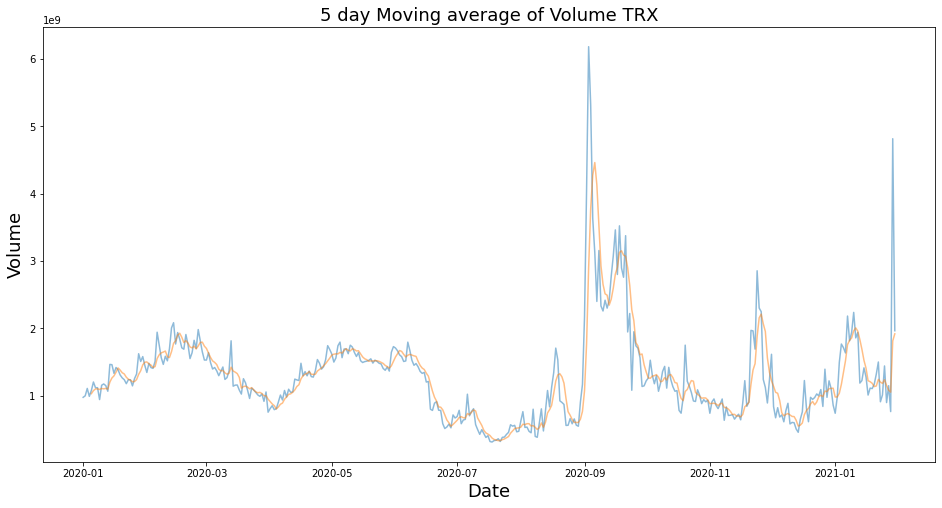

In [41]:
#create a function to calculate SMA
def SMA(filtered_data_trx, period = 5,column = 'Volume'):
    return filtered_data_trx[column].rolling(window=period).mean()
#create two column to store 5 SMA
filtered_data_trx['SMA5'] = SMA(filtered_data_trx,5)
#visually show the SMA
plt.figure(figsize=(16,8))
plt.title('5 day Moving average of Volume USDT', fontsize = 18)
plt.plot(filtered_data_trx['Volume'],alpha=0.5, label='Volume')
plt.plot(filtered_data_trx['SMA5'],alpha=0.5, label='SMA5')
plt.xlabel('Date',fontsize=18)
plt.ylabel('Volume', fontsize=18)
plt.show()